# Úkoly

1. Vygenerujte náhodná data a zobrazte je jako scatter plot pomocí. Nastavte barvu a velikost bodů.


In [50]:

import matplotlib.pyplot as plt 
import numpy as np
import math
import time

[2 7 4 9 5] [35 16 12 38 24]


<function matplotlib.pyplot.show(close=None, block=None)>

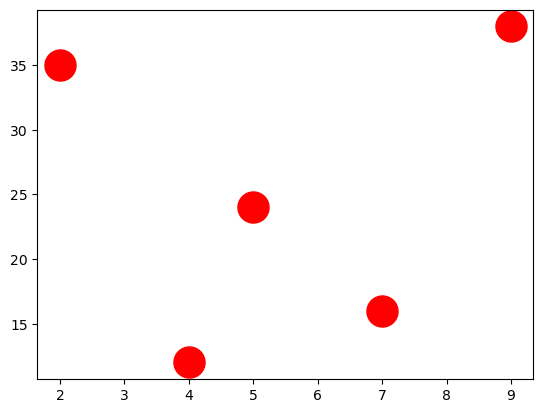

In [28]:
x = np.random.randint(1,10,5)
y = np.random.randint(1,50,5)

print(x,y)
plt.scatter(x,y, s = 500, color = "red")
plt.show


2. Vykreslete 3D graf s funkcí $$z = \frac{\sin(\sqrt{x^2 + y^2})}{\sqrt{x^2 + y^2}}$$ Použijte `imagesc` a `contour`.


C:\Users\vasen\AppData\Local\Temp\ipykernel_14752\697339060.py:4: RuntimeWarning: invalid value encountered in true_divide
  Z = np.sin(np.sqrt(X**2 + Y**2)) / np.sqrt(X**2 + Y**2)


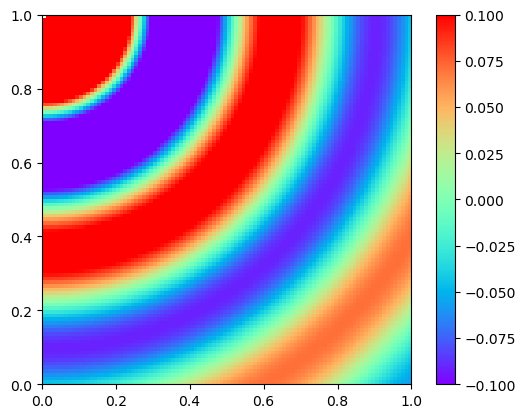

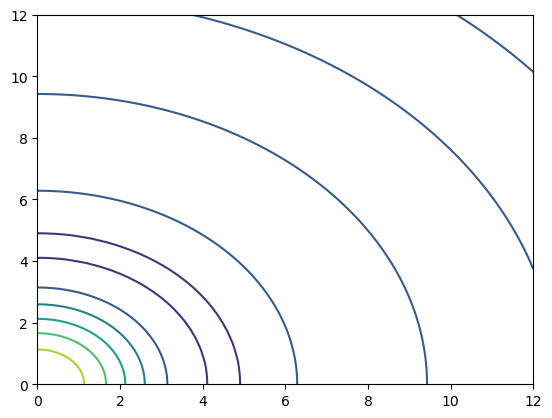

In [28]:
x = np.linspace(0, 12, 100)
y = np.linspace(0, 12, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2)) / np.sqrt(X**2 + Y**2)


fig,ax = plt.subplots()
im = ax.imshow(Z, cmap='rainbow',vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0,1,0,1])
plt.colorbar(im, ax=ax)

fig,ax = plt.subplots()
cp = ax.contour(X, Y, Z)




3. Vykreslete polar graf s funkcí $r = 2\sin(3θ)$. Použijte funkci plot a nastavte barvu, osy a titulek.


Text(0.5, 1.0, 'Polar graf')

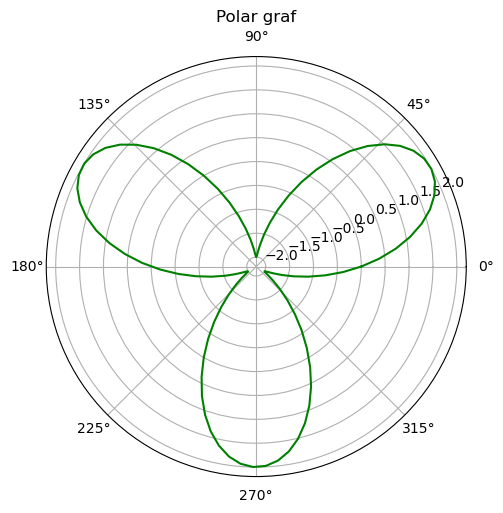

In [48]:
fig = plt.figure(figsize=(7,7))

# Polární souřadnice
ax = fig.add_axes([0.0, 0.0, .6, .6], polar=True)
θ = np.linspace(0, 2*np.pi, 100)
r = 2*np.sin(3*θ)

# Jednoduchá spirála
ax.plot(θ, r, color='green')
ax.set_title("Polar graf")



4. Vygenerujte náhodná data a zobrazte je jako histogram. Nastavte počet binů, barvu a popisky os.


Text(0, 0.5, 'osa y')

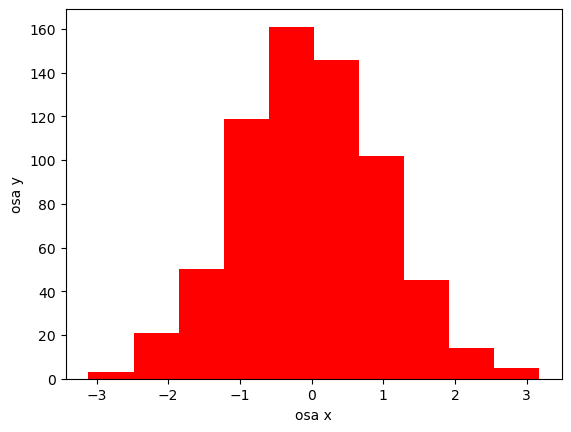

In [65]:
n = np.random.randn(666)  
plt.hist(n, 10, color = "red") 
plt.xlabel("osa x")
plt.ylabel("osa y")


5. Vytvořte 3D surf graf s funkcí $$z = \cos(\sqrt{x^2 + y^2})$$


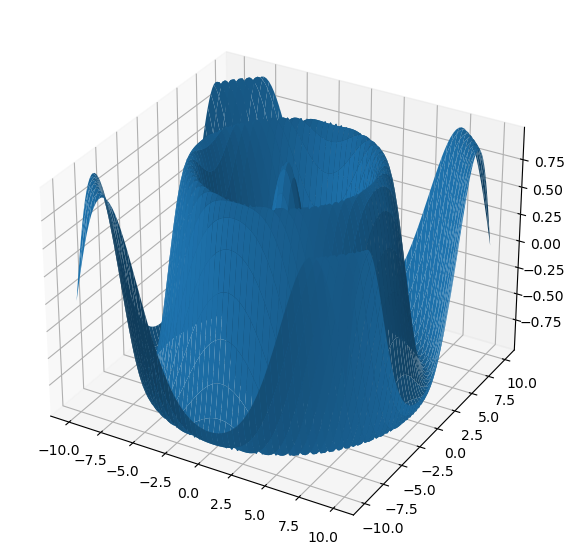

In [42]:
Z = np.cos(np.sqrt(X**2 + Y**2))

fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(1, 1, 1, projection='3d')
p = ax.plot_surface(X, Y, Z)



# Domácí úkol
- Použijte funkce z minulého úkolu `integer_spiral_numpy` a `integer_spiral` a vykreslete spirálu a její sinus pomocí `imshow` a `contour`.
- měřte časy výpočtu pro různé hodnoty mezi 11 a 1001 a porovnejte je.
- vykreslete log-log (obě osy v logaritmickém měřítku) graf obou časů do jednoho grafu.
- nastavte popisky, legendu a osy
- co vypovídají tyto grafy o výpočetních náročnostech obou funkcí? co reprezentuje sklon lineárního grafu v log-log grafu? 

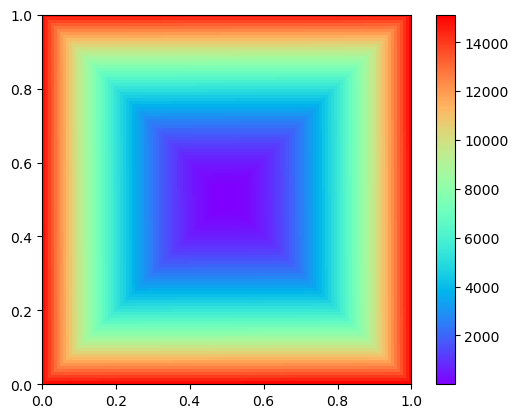

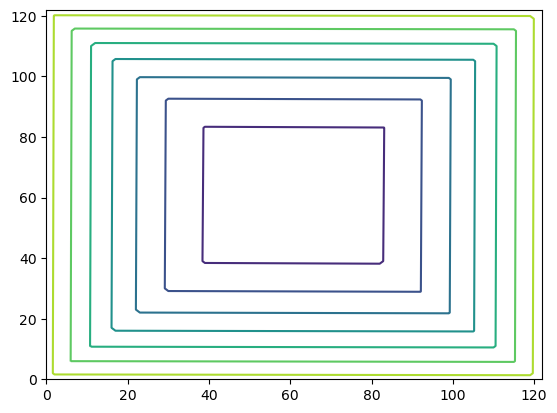

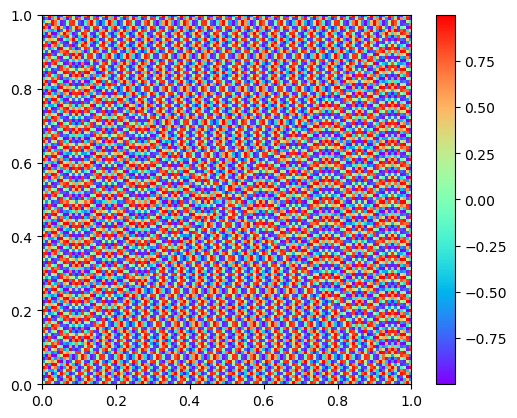

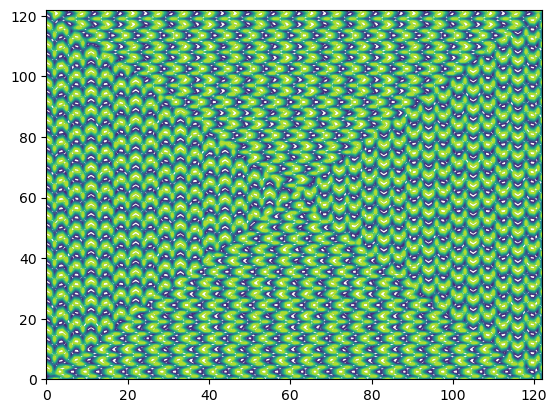

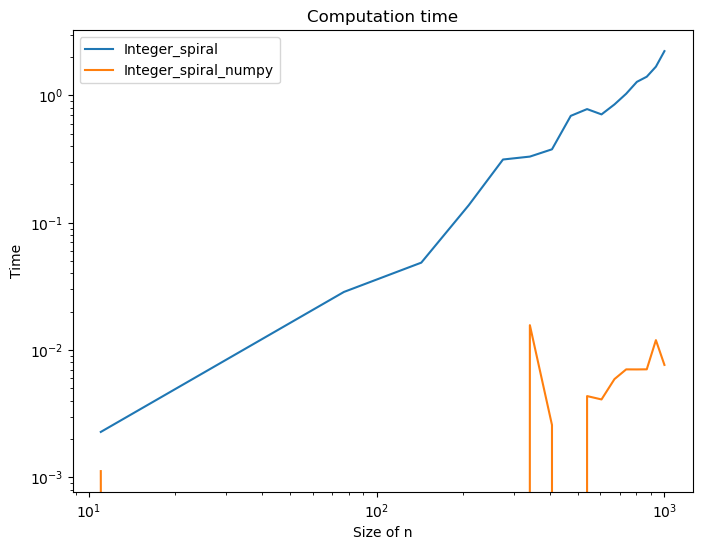

In [68]:
def integer_spiral(n):

    A = np.zeros((n + 2, n + 2))

    pos_row = n//2 + 1
    pos_col = n//2 + 1

    i = 1

    A[pos_row, pos_col] = i
    i += 1
    pos_row -= 1

    while i <= n**2:
        A[pos_row, pos_col] = i
        i += 1
        if A[pos_row - 1, pos_col] != 0 and A[pos_row, pos_col + 1] == 0:
            pos_col += 1
        elif A[pos_row, pos_col - 1] != 0:
            pos_row -= 1
        elif A[pos_row + 1, pos_col] != 0:
            pos_col -= 1
        else:
            pos_row += 1

    return A[1:-1, 1:-1]

def integer_spiral_numpy(n):

    A = np.zeros((n+2,n+2),dtype=int)
    i=n//2+1
    j=n//2+1
    A[i,j]=1
    k=1
    num=k+1
    length = k*2
    while k < n//2+1:

        topline=np.arange(num,num+length)
        A[i-k,j+k-1:j-k-1:-1]=topline

        leftline=np.arange(topline[-1]+1,topline[-1]+1+length)
        A[i-k+1:i+k+1,j-k]=leftline

        bottomline=np.arange(leftline[-1]+1,leftline[-1]+1+length)
        A[i+k,j-k+1:j+k+1]=bottomline

        rightline=np.arange(bottomline[-1]+1,bottomline[-1]+1+length)
        A[i+k-1:i-k-1:-1,j+k]=rightline

        num = rightline[-1]+1

        k+=1
        length=k*2

    return A[1:-1, 1:-1]


n = 123
sinus = np.sin(integer_spiral(n))


fig,ax = plt.subplots()
im = ax.imshow(integer_spiral(n), cmap="rainbow", extent=[0,1,0,1])
plt.colorbar(im, ax=ax)

fig,ax = plt.subplots()
cp = ax.contour(integer_spiral(n))

fig,ax = plt.subplots()
im = ax.imshow(sinus, cmap="rainbow",extent=[0,1,0,1])
plt.colorbar(im, ax=ax)

fig,ax = plt.subplots()
cp = ax.contour(sinus)


time1 = []
time2 = []

value = np.arange(11, 1002, 66)

for n in value:
    start = time.time()
    spiral = integer_spiral(n)
    end = time.time()
    time1.append(end - start)

    start = time.time()
    spiral_np = integer_spiral_numpy(n)
    end = time.time()
    time2.append(end - start)


fig, ax = plt.subplots(figsize=(8,6))
ax.plot(value,time1, label = "Integer_spiral")
ax.plot(value,time2,label = "Integer_spiral_numpy")
ax.set_xscale("log")
ax.set_yscale("log")

ax.legend()
ax.set_xlabel("Size of n")
ax.set_ylabel("Time")
ax.set_title("Computation time")
plt.show()


# Bonusový úkol
Použijte funkci `polyfit` z knihovny `numpy` pro logaritmicky transponované časy a počty prvků a zjistěte koeficient u lineární funkce při aproximaci polynomem 1. stupně.

Vykreslete lineární aproximace získané funkci `polyfit` do log-log grafu společne s naměřenými daty.